# Sample Usage: Portfolio Optimization

### Introduction

This tutorial shows how to solve the following mean-variance portfolio optimization problem for $n$ assets:

$$\begin{aligned}
\min_{x \in \{0, 1\}^n}  q x^T \Sigma x - \mu^T x\\
\text{subject to: } 1^T x = B
\end{aligned}$$

where we use the following notation:

- $x \in \{0, 1\}^n$ denotes the vector of binary decision variables, which indicate which assets to pick ($x[i] = 1$) and which not to pick ($x[i] = 0$),
- $\mu \in \mathbb{R}^n$ defines the expected returns for the assets,
- $\Sigma \in \mathbb{R}^{n \times n}$ specifies the covariances between the assets,
- $q > 0$ controls the risk appetite of the decision maker,
- and $B$ denotes the budget, i.e. the number of assets to be selected out of $n$.

We assume the following simplifications:
- all assets have the same price (normalized to 1),
- the full budget $B$ has to be spent, i.e. one has to select exactly $B$ assets.

The equality constraint $1^T x = B$ is mapped to a penalty term $(1^T x - B)^2$ which is scaled by a parameter and subtracted from the objective function. 
The resulting problem can be mapped to a Hamiltonian whose ground state corresponds to  the optimal solution.
This notebook shows how to use the Sampling Variational Quantum Eigensolver (`SamplingVQE`) or the Quantum Approximate Optimization Algorithm (`QAOA`) from [Qiskit Algorithms](https://qiskit-community.github.io/qiskit-algorithms/apidocs/qiskit_algorithms.html#minimum-eigensolvers) to find the optimal solution for a given set of parameters.

Experiments on real quantum hardware for this problem are reported for instance in the following paper:
<br>
[Improving Variational Quantum Optimization using CVaR. Barkoutsos et al. 2019.](https://arxiv.org/abs/1907.04769)

In [1]:
# Setting import path
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', 'quantum_optimization'))

In [2]:
import matplotlib.pyplot as plt
from visualizer import print_result, display_stocks_graph

### Load Stocks Data

#### Get Random Stock Data

In [3]:
from  get_stocks_data import get_random_data

## PARAMETERS
num_stocks = 5
seed=123
start_date=(2024, 1, 1)
end_date=(2024, 1, 30)

## GET RANDOM DATA
print("RANDOM DATA FOR 5 ASSETS:  ")
data, stocks, mu, sigma = get_random_data(num_stocks, seed, start_date, end_date)
print("Stocks: ", stocks)
print("Mean return: ", mu)
print("Covariance: ", sigma)

RANDOM DATA FOR 5 ASSETS:  
Stocks:  ['TICKER 0', 'TICKER 1', 'TICKER 2', 'TICKER 3', 'TICKER 4']
Mean return:  [ 0.01528439 -0.00078095  0.00051792  0.00087001  0.01032352]
Covariance:  [[ 2.54138859e-03  7.34022167e-05  1.28600531e-04 -9.98612132e-05
  -3.13199203e-04]
 [ 7.34022167e-05  2.58486713e-04  5.30427595e-05  4.44816208e-05
  -1.32451573e-05]
 [ 1.28600531e-04  5.30427595e-05  7.91504681e-04 -1.23887382e-04
  -9.70273385e-07]
 [-9.98612132e-05  4.44816208e-05 -1.23887382e-04  1.97892585e-04
   8.51533522e-05]
 [-3.13199203e-04 -1.32451573e-05 -9.70273385e-07  8.51533522e-05
   5.43294856e-04]]


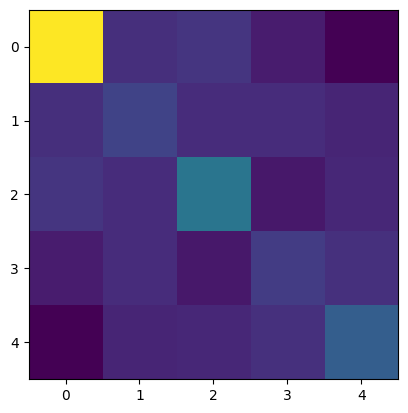

In [4]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

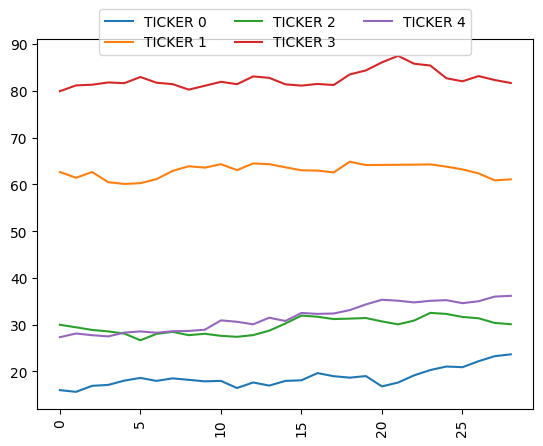

In [5]:
display_stocks_graph(data)

#### Get Yahoo Finance Data

In [6]:
import os
from import_stocks import read_stock_symbols
from get_stocks_data import get_yahoo_data

# Define the base path relative to the current working directory
base_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'assets'))
stocks_symbol_list_path = os.path.join(base_path, 'nasdaq_100_stocks.csv')

stocks = read_stock_symbols(stocks_symbol_list_path, num_symbols=5)
start_date=(2018, 1, 1)
end_date=(2020, 1, 30)

data, tickers, mu, sigma = get_yahoo_data(stocks, start_date, end_date)

print("Stocks: ", stocks)
print("Mean return: ", mu)
print("Covariance: ", sigma)

Stocks:  ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN']
Mean return:  [0.001422   0.00146497 0.00073748 0.00071872 0.00103379]
Covariance:  [[0.00029801 0.0001761  0.00017784 0.00017514 0.00020138]
 [0.0001761  0.00023284 0.00018618 0.00018558 0.00021579]
 [0.00017784 0.00018618 0.00026758 0.00026468 0.00021273]
 [0.00017514 0.00018558 0.00026468 0.00026435 0.00021087]
 [0.00020138 0.00021579 0.00021273 0.00021087 0.00035352]]


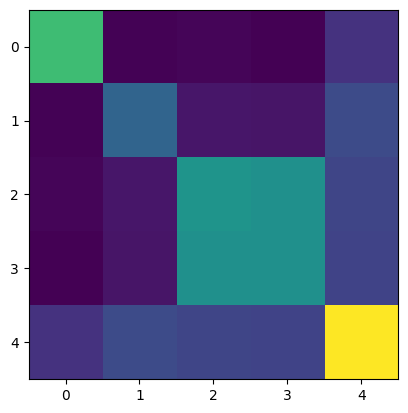

In [7]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

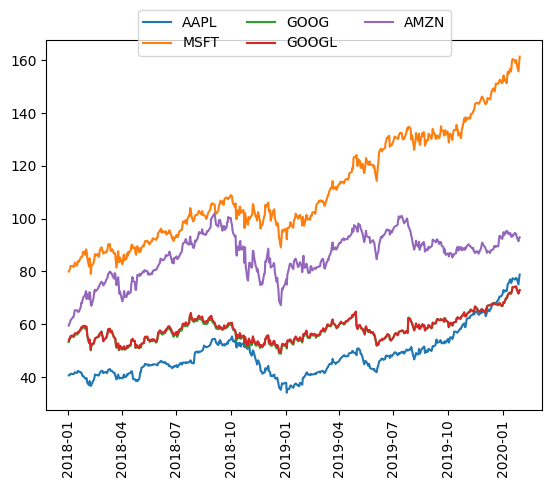

In [8]:
display_stocks_graph(data)

### Define Portfolio Optimization Problem

In [9]:
from portfolio import define_portfolio_optimization_problem

q = 0.5  # set risk factor
budget = 3  # set budget

portfolio, portfolio_quadratic_program = define_portfolio_optimization_problem(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget)
print("Portfolio Quadratic Program: ", portfolio_quadratic_program)

Portfolio Quadratic Program:  minimize 0.0001490067699530459*x_0^2 + 0.0001760978414112484*x_0*x_1 + 0.00017783552116841457*x_0*x_2 + 0.0001751418745579839*x_0*x_3 + 0.00020138272731593594*x_0*x_4 + 0.0001164205721263515*x_1^2 + 0.00018617694077618832*x_1*x_2 + 0.0001855772553550357*x_1*x_3 + 0.00021578967214155132*x_1*x_4 + 0.00013378759479955768*x_2^2 + 0.00026468450621626254*x_2*x_3 + 0.00021273034648573833*x_2*x_4 + 0.00013217359804846516*x_3^2 + 0.00021086670484482726*x_3*x_4 + 0.0001767586506029921*x_4^2 - 0.0014220035506803696*x_0 - 0.0014649672232387762*x_1 - 0.0007374813814049051*x_2 - 0.0007187150833367909*x_3 - 0.0010337875655491845*x_4 (5 variables, 1 constraints, 'Portfolio optimization')


### Solve the portfolio optimization problem

#### Solve using NumPyMinimumEigensolver (as a classical reference)

In [10]:
from solver import solve_using_numpy_minimum_eigensolver

result = solve_using_numpy_minimum_eigensolver(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1.], value -0.0029
Optimal Companies: ['AAPL', 'MSFT', 'AMZN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 1 0 0 1]	-0.0029		1.0000


#### Solve using Solution using `SamplingVQE`

In [11]:
from solver import solve_using_sampling_vqe

num_stocks = len(stocks)
result = solve_using_sampling_vqe(portfolio_quadratic_program, num_stocks)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 1. 0. 0.], value -0.0027
Optimal Companies: ['AAPL', 'MSFT', 'GOOG']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 0 1 1 1]	-0.0014		0.2910
[1 0 1 1 0]	-0.0018		0.2051
[1 0 1 1 1]	-0.0021		0.1836
[0 1 1 0 0]	-0.0018		0.0879
[1 1 1 0 0]	-0.0027		0.0557
[0 0 1 1 0]	-0.0009		0.0537
[1 0 0 1 1]	-0.0021		0.0400
[0 0 0 1 1]	-0.0012		0.0332
[1 1 0 0 0]	-0.0024		0.0107
[0 1 0 0 1]	-0.0020		0.0098
[1 0 0 1 0]	-0.0017		0.0098
[0 1 1 1 0]	-0.0019		0.0059
[0 1 0 1 1]	-0.0022		0.0029
[1 1 1 1 0]	-0.0026		0.0020
[0 0 1 0 1]	-0.0012		0.0020
[1 1 0 1 0]	-0.0027		0.0020
[1 1 1 1 1]	-0.0027		0.0020
[0 1 0 1 0]	-0.0017		0.0010
[0 1 1 1 1]	-0.0021		0.0010
[0 0 0 1 0]	-0.0006		0.0010


#### Solve using Solution using `QAOA`

In [12]:
from solver import solve_using_qaoa

num_stocks = len(stocks)
result = solve_using_qaoa(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1.], value -0.0029
Optimal Companies: ['AAPL', 'MSFT', 'AMZN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 1 1 1]	-0.0021		0.1182
[1 1 1 0 1]	-0.0029		0.1113
[1 1 0 1 1]	-0.0029		0.1035
[1 1 1 1 0]	-0.0026		0.0928
[1 0 1 1 1]	-0.0021		0.0889
[1 1 1 1 1]	-0.0027		0.0527
[0 0 1 0 0]	-0.0006		0.0342
[1 1 0 1 0]	-0.0027		0.0322
[1 0 1 1 0]	-0.0018		0.0322
[0 1 1 1 0]	-0.0019		0.0312
[0 1 1 0 1]	-0.0022		0.0303
[0 1 0 1 1]	-0.0022		0.0273
[1 0 1 0 1]	-0.0021		0.0254
[1 0 0 1 1]	-0.0021		0.0254
[1 1 1 0 0]	-0.0027		0.0244
[1 1 0 0 1]	-0.0029		0.0225
[0 0 1 1 1]	-0.0014		0.0215
[1 0 0 0 0]	-0.0013		0.0215
[0 1 0 0 0]	-0.0013		0.0205
[0 0 0 1 0]	-0.0006		0.0205
[0 0 0 0 1]	-0.0009		0.0186
[0 0 0 1 1]	-0.0012		0.0078
[0 1 0 1 0]	-0.0017		0.0059
[0 0 1 0 1]	-0.0012		0.0049
[0 1 0 0 1]	-0.0020		0.0039
[1 0 0 1 0]	-0.0017		0.0039
[0 0 1 1 0]	-0.0009		0.0039
[1 0 1 0 0]	-0.